In [157]:
import ollama
import requests
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [158]:
reviews = []
driver = webdriver.Chrome()
url = 'https://www.quince.com/women/linen-tank-top?color=sand&gender=women&tracker=collection_page__women%2Fshirts-%26-blouses__Sleeveless__5'
driver.get(url)
driver.maximize_window()
sleep(3)
review_id = 0

k = range(1,398)

j = range(1,5)

driver.execute_script("window.scrollTo(0, 3000)")
driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[1]/div/div/div').click()
driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[1]/div/div/ul/li[2]').click()

for l in k:
    sleep(2)
    driver.execute_script("window.scrollTo(0, 4300)")
    for i in j:
        a = driver.find_element(By.XPATH ,'/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[2]/div[2]/div/div['+ str(i) +']/div[2]/div').find_elements(By.XPATH, '*')
        stars = 0
        for element in a:
            if element.get_attribute("class") == "cursor--pointer reviewStars-module--starIcon--3572e":
                stars = stars + 1
            else:
                pass
        try:
            reviews.append({"review_id" : review_id,
            "rating" : stars,
            "title" : driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[2]/div[2]/div/div['+ str(i) +']/div[2]/h3').text,
            "message" : driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[2]/div[2]/div/div['+ str(i) +']/div[2]/p').text})
        except:
            pass

        review_id = review_id + 1
    
    driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[3]/button[6]').click()


driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/main/div/div/div/div[4]/div/div/div[3]/div/div[1]/div/div/div/svg').click()

ElementClickInterceptedException: Message: element click intercepted: Element <button class="pagination-module--icon_color__black--05ff7 button button--text margin-left--2" aria-label="Next">...</button> is not clickable at point (1048, 870). Other element would receive the click: <div class="cookieBanner-module--cookieBanner__contentContainer--e46cb">...</div>
  (Session info: chrome=124.0.6367.119)
Stacktrace:
	GetHandleVerifier [0x00007FF6E9791572+60802]
	(No symbol) [0x00007FF6E970AC72]
	(No symbol) [0x00007FF6E95C7CE4]
	(No symbol) [0x00007FF6E961E877]
	(No symbol) [0x00007FF6E961C344]
	(No symbol) [0x00007FF6E961980A]
	(No symbol) [0x00007FF6E96189E2]
	(No symbol) [0x00007FF6E960AE8B]
	(No symbol) [0x00007FF6E963AB7A]
	(No symbol) [0x00007FF6E960A7C6]
	(No symbol) [0x00007FF6E963AD90]
	(No symbol) [0x00007FF6E965A224]
	(No symbol) [0x00007FF6E963A923]
	(No symbol) [0x00007FF6E9608FEC]
	(No symbol) [0x00007FF6E9609C21]
	GetHandleVerifier [0x00007FF6E9A9420D+3217949]
	GetHandleVerifier [0x00007FF6E9AD61A7+3488183]
	GetHandleVerifier [0x00007FF6E9ACF12F+3459391]
	GetHandleVerifier [0x00007FF6E984B936+823622]
	(No symbol) [0x00007FF6E971600F]
	(No symbol) [0x00007FF6E9710F34]
	(No symbol) [0x00007FF6E97110C2]
	(No symbol) [0x00007FF6E9701914]
	BaseThreadInitThunk [0x00007FF8FEF8257D+29]
	RtlUserThreadStart [0x00007FF90076AA48+40]


In [160]:
df = pd.DataFrame(reviews)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  659 non-null    int64 
 1   rating     659 non-null    int64 
 2   title      659 non-null    object
 3   message    659 non-null    object
dtypes: int64(2), object(2)
memory usage: 20.7+ KB


In [159]:
with open('100% European Linen Tank', 'w') as fout:
    json.dump(reviews, fout)

In [161]:
df.loc[(df['rating'] <= 3)]
reviews_low = [x for x in reviews if x['rating'] <= 3]

,review_id,rating,title,message
0,0,1,Looks messy,I liked the fit but it got SUPER wrinkled as s...
1,1,1,Poor fit,I had to return it because it had huge arm hol...
2,2,1,Gaping armholes,I have purchased seven Quince products and hav...
3,3,1,So large and boxy,This is a terrible fit. It’s EXTREMELY large i...
4,4,2,"Well made, armholes huge",Others commented about the armholes and they w...
...,...,...,...,...
81,82,3,Fabric is great. Clean sewing,I ordered a large in this top along with crop ...
82,83,3,I like this shirt,I got three of these for summer. While I like ...
83,84,3,Boxy cut,Loved the linen fabric but it was way too boxy...
84,85,3,"Nice, but...","This blouse is cute and well-made. However, th..."


In [168]:
themes = []

for item in reviews_low:
    response = ollama.chat(model='llama3', messages=[
      {
        'role': 'system',
        'content': 'You will be provided with product reviews from an e-commerce luxury brand in the following format: review_id, rating, title, message. Your goal will be to extract one, two or three main theme(s) that the user who wrote the review thinks are negative about the product and provide the output in the following list format: ["theme 1", "theme 2"] or ["theme 1", "theme 2", "theme 3"]. In the case where there is no negative or nothing to report just return an empty list: [""]. Keep the themes to one word'
      },
      {
        'role': 'user',
        'content': str(item)
      }, 
    ])
    print(response['message']['content'])
    themes.append(response['message']['content'])

["wrinkled"]
["fit"]
["fit"]
["fit"]
["fit"]
["fit", "stitching"]
["fit"]
["fit"]
["fit", "length"]
["fit"]
["big", "boxy"]
["fitting"]
["fit"]
["poorly"]
["fit"]
["wrinkled", "raggedy"]
["fit"]
["fit"]
['fit']
["fit"]
["fit"]
["large"]
["runs", "tight"]
["gaping"]
["fit", "style"]
["fit"]
["sizing", "fit"]
["boxy", "unfussy"]
["fit", "unsuitable"]
["fit", "size"]
["gapping", "fit"]
["fit"]
["fit"]
["wrinkles"]
["fit"]
["fit"]
["gaping", "incomplete"]
["fit"]
["fit", "size"]
['fit']
["fit"]
["scratchy", "unflattering"]
['fit']
['fit']
["boxy", "see-through"]
["quality"]
["loose"]
["fit"]
["fit"]
["fit"]
["fit"]
["fit"]
["size"]
["unflattering"]
['small']
["incomplete"]
["boxy", "unstructured"]
["fit", "curves"]
["fit", "size"]
["size", "color"]
["fit"]
["oversized", "unflattering"]
["fit"]
["size", "fit"]
["fit"]
["boxy", "unflattering"]
["fit"]
["unflattering", "boxy"]
["wrinkles"]
["fit"]
["fit", "size"]
["unwearable"]
["boxy", "big"]
["fit", "size"]
["size", "quality"]
["fit"]
["unf

In [169]:
theme = ""
for item in themes:
    theme = theme + " " + str(item)

In [178]:
theme = theme.replace("'", "").replace("[", "").replace("]", "").replace("\\", "").replace(",", "").replace('"', "")

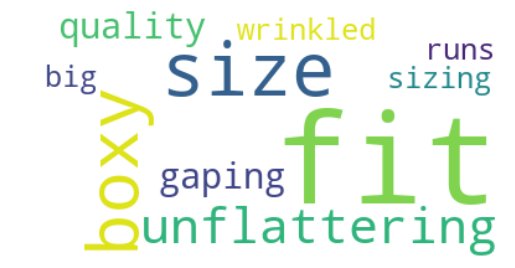

In [182]:
wordcloud = WordCloud(max_font_size=100, max_words=10, background_color="white").generate(theme)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()